# Project - Image Classification Using Convolutional Neural Network (Digit Prediction)

In [1]:
import pandas as pd
A=pd.read_csv('digitsnpixels.csv')

In [2]:
#pip install opencv-python

In [3]:
A.shape

(42000, 785)

In [4]:
A.head(20)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visulalizing some pictures from dataset

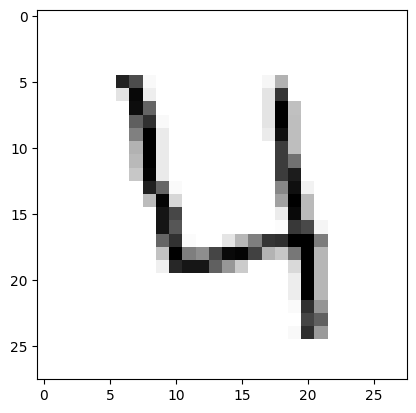

In [5]:
import matplotlib.pyplot as plt
X=A.drop(labels=['label'],axis=1).values
plt.imshow(X[3:4].reshape(28,28),cmap=plt.cm.binary)

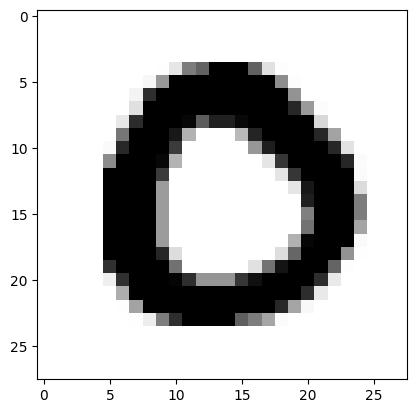

In [6]:
import matplotlib.pyplot as plt
X=A.drop(labels=['label'],axis=1).values
plt.imshow(X[4:5].reshape(28,28),cmap=plt.cm.binary)

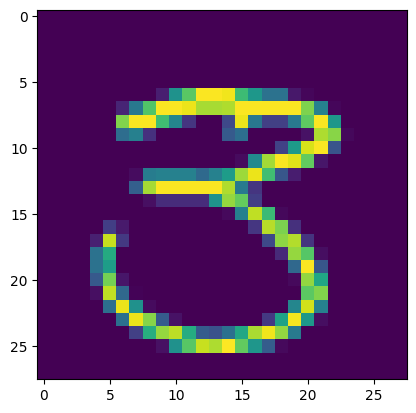

In [7]:
import matplotlib.pyplot as plt
X=A.drop(labels=['label'],axis=1).values
plt.imshow(X[7:8].reshape(28,28))

### One Hot Encoding of Y Column and change that to array

In [8]:
Y=A.label

In [9]:
Y_cat=pd.get_dummies(Y).values
#OR
#import tensorflow as tf
#tf.keras.ytils.to_catogarical(Y)
Y_cat[1:50]

array([[ True, False, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False, False, False, False,  True, False, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
        False],
       [False, False, False,  True, False, False, False, False, False,
        False],
       [False, False, False, False, False,  True, False, False, False,
        False],
       [False, False, False,  True, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False,  True,
        False],
       [False, False, False, False, False, False, False, False, False,
         True],
       [False,  True, False, False, False, 

### Scaling the X data

In [10]:
X_scaled=X/255
X_scaled[1:50]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Spliting X and Y into training and testing test

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,Y_cat,test_size=0.2,random_state=21)

In [12]:
xtrain.shape

(33600, 784)

In [13]:
xtest.shape

(8400, 784)

### Reshaping data for convolutional neural network

In [14]:
xtrain=xtrain.reshape(33600,28,28,1)
xtest=xtest.reshape(8400,28,28,1)

## Convolutional Neural Network

In [15]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,BatchNormalization,Flatten
es=EarlyStopping(patience=5)
nn=Sequential()
nn.add(Convolution2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
#pooled version of image should be normalize thats why we used BatchNormalization
nn.add(Dropout(0.1))
nn.add(Flatten())
#converting matrix form to flatten(dataset format)
nn.add(Dense(120,activation='relu'))  #Fullyconnected layer
nn.add(Dense(10,activation='softmax')) #output layer

In [16]:
nn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
nn.fit(xtrain,ytrain,epochs=50,validation_split=0.2,callbacks=es)


Epoch 1/50


840/840 [==============================] - 4s 4ms/step - loss: 0.1854 - accuracy: 0.9426 - val_loss: 0.0943 - val_accuracy: 0.9720
Epoch 2/50
840/840 [==============================] - 3s 4ms/step - loss: 0.0577 - accuracy: 0.9816 - val_loss: 0.0864 - val_accuracy: 0.9766
Epoch 3/50
840/840 [==============================] - 3s 4ms/step - loss: 0.0323 - accuracy: 0.9889 - val_loss: 0.0848 - val_accuracy: 0.9756
Epoch 4/50
840/840 [==============================] - 3s 4ms/step - loss: 0.0209 - accuracy: 0.9930 - val_loss: 0.0947 - val_accuracy: 0.9778
Epoch 5/50
840/840 [==============================] - 3s 4ms/step - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0973 - val_accuracy: 0.9778
Epoch 6/50
840/840 [==============================] - 4s 4ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0981 - val_accuracy: 0.9799
Epoch 7/50
840/840 [==============================] - 3s 4ms/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.1022 - val_accuracy: 0.9778
Epo

### Predicting Test Data

In [17]:
pred_prob=nn.predict(xtest)

263/263 [==============================] - 1s 2ms/step


In [18]:
from numpy import argmax
pred=argmax(pred_prob,axis=1)
pred                            # want highest value form all 10 values thats why used argmax

array([1, 4, 2, ..., 0, 1, 2], dtype=int64)

In [19]:
ytest=argmax(ytest,axis=1)
ytest

array([1, 4, 2, ..., 0, 1, 2], dtype=int64)

### Evaluation of model

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,ytest)

0.9792857142857143